If you’re learning Python and would like to develop a machine learning model then a library that you want to seriously consider is scikit-learn. Scikit-learn (also known as sklearn) is a machine learning library used in Python that provides many unsupervised and supervised learning algorithms.

In this simple guide, we’re going to create a machine learning model that will predict whether a movie review is positive or negative. This is known as binary text classification and will help us explore the scikit-learn library while building a basic machine learning model from scratch. These are the topics we’re going to learn in this guide.

Read full blog : https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

User Guide : https://scikit-learn.org/stable/user_guide.html

# What we are going to cover:

* An end-to-end Scikit-Learn workflow
* Getting data ready ( to be used with machine learning models)
* Choosing a machine learning model
* Fitting a model to the data (learning patterns)
* Making Predictions with a model (using patterns)
* Evaluating model predictions
* Improving model predictions
* Saving and loading models

# An end-to-end Scikit-Learn workflow

In [1]:
# Import data
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')

In [2]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
# Create x (features matrix)
X = heart_disease.drop("target", axis =1)

# Create y
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100)

# We will keep the defailt hyper-parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [6]:
# All models/estimators have the fit() function built-in
clf.fit(X_train, y_train)

# Once fit is called, you can make predictions using predict()
y_preds = clf.predict(X_test)

# You can also predict with probabilities (on classification models)
y_probs = clf.predict_proba(X_test)

# View preds/probabilities
y_preds, y_probs

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([[0.92, 0.08],
        [0.36, 0.64],
        [0.36, 0.64],
        [0.91, 0.09],
        [0.25, 0.75],
        [0.17, 0.83],
        [0.23, 0.77],
        [0.97, 0.03],
        [0.97, 0.03],
        [0.51, 0.49],
        [0.22, 0.78],
        [0.66, 0.34],
        [0.06, 0.94],
        [0.93, 0.07],
        [0.05, 0.95],
        [0.01, 0.99],
        [0.03, 0.97],
        [0.85, 0.15],
        [0.95, 0.05],
        [0.96, 0.04],
        [0.49, 0.51],
        [0.93, 0.07],
        [0.33, 0.67],
        [0.22, 0.78],
        [0.32, 0.68],
        [0.24, 0.76],
        [0.24, 0.76],
        [0.23, 0.77],
        [0.92, 0.08],
        [0.14, 0.86],
        [0.89, 0.11],
        [0.92, 0.08],
        [0.95, 0.05],
        [0.63, 0.37],
        [0.5 , 0.5 ],
        

In [7]:
# 4. Evaluate the model

In [8]:
clf.score(X_test, y_test)

0.8360655737704918

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [10]:
# Evaluting a model using cross-validation is possible with cross_val_score
from sklearn.model_selection import cross_val_score

# scoring=None means default score() metric is used
print(cross_val_score(estimator=clf, 
                      X=X, 
                      y=y, 
                      cv=5, # use 5-fold cross-validation
                      scoring=None)) 

# Evaluate a model with a different scoring method
print(cross_val_score(estimator=clf, 
                      X=X, 
                      y=y,
                      cv=5, # use 5-fold cross-validation
                      scoring="precision"))

[0.85245902 0.8852459  0.80327869 0.81666667 0.78333333]
[0.80555556 0.93333333 0.8125     0.80555556 0.75      ]


In [11]:
# Different classification metrics

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))

# Reciver Operating Characteristic (ROC curve)/Area under curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:, 1])
print(roc_auc_score(y_test, y_preds))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

0.8360655737704918
0.8356681034482758
[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Getting the data Ready:

In [12]:
# import libs 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 1. Getting out data ready to be used with machine learning 


Three main things we have to do:
1. Split the data inro features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [14]:
# Create x and y data 
x = heart_disease.drop(("target"),axis = 1 )
y = heart_disease["target"]

In [15]:
x.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [17]:
# Split the data into training and test sets:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2 , random_state= 42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [19]:
X.shape

(303, 13)

In [20]:
len(heart_disease)

303

# # 1.1 Make sure it's all numerical 

In [21]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [22]:
len(car_sales)

1000

In [23]:
# Split the data in x and y

In [24]:
# Split inro x and y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [25]:
# Split data into train test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [26]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

`ValueError:` could not convert string to float: 'Honda'

In [27]:
# We have to convert strings into numbers:

In [28]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder= "passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_x) # we took one hot encoder and applied on categorical feature

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [33]:
dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies

Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  Colour_Black  \
0        4     False        True        False        False         False   
1        5      True       False        False        False         False   
2        4     False        True        False        False         False   
3        4     False       False        False         True         False   
4        3     False       False         True        False         False   
..     ...       ...         ...          ...          ...           ...   
995      4     False       False        False         True          True   
996      3     False       False         True        False         False   
997      4     False       False         True        False         False   
998      4     False        True        False        False         False   
999      4     False       False        False         True         False   

     Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0          False         False       False          True  
1           True         False       False         False  
2          False         False       False          True  
3          False         False       False          True  
4           True         False       False         False  
..           ...           ...         ...           ...  
995        False         False       False         False  
996        False         False       False          True  
997         True         False       False         False  
998        False         False       False          True  
999         True         False       False         False  

[1000 rows x 10 columns]

In [34]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size= 0.2)

In [35]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
model.score(X_test,y_test)

0.3235867221569877

In [37]:
# let's look out previous data
X.head()

Make Colour  Odometer (KM)  Doors
0   Honda  White          35431      4
1     BMW   Blue         192714      5
2   Honda  White          84714      4
3  Toyota  White         154365      4
4  Nissan   Blue         181577      3

### 1.2 Missing values

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [39]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Create x and y
X = car_sales_missing.drop("Price", axis = 1 )
y = car_sales_missing["Price"]

In [44]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder= "passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [46]:
X.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [47]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [49]:
## Option 1 : Fill missing data with pandas
car_sales_missing['Make'].fillna("missing", inplace= True)

# fill the "colour" column
car_sales_missing["Colour"].fillna("missing", inplace= True)

# Fill the odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace= True)

In [50]:
# Check out dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# Remove rows with missing `Price` value 
car_sales_missing.dropna(inplace = True)

In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_sales_missing)

950

We kind of lost 50 samples

In [56]:
X = car_sales_missing.drop("Price", axis= 1 )
y = car_sales_missing["Price"]

In [58]:
X.head()

Make Colour  Odometer (KM)  Doors
0   Honda  White        35431.0    4.0
1     BMW   Blue       192714.0    5.0
2   Honda  White        84714.0    4.0
3  Toyota  White       154365.0    4.0
4  Nissan   Blue       181577.0    3.0

In [60]:
# Convert character values to integers

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2 : Fill missing values with scikit learn.

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.
**It's called Feature Scaling.**

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.


* **Normalization** (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

* **Standardization** - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.


In [3]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [4]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
car_sales_missing.dropna(subset = ['Price'], inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [6]:
# Split into x & y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing['Price']

In [7]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy= "constant",fill_value= "missing")
door_imputer = SimpleImputer(strategy= "constant", fill_value= 4)
num_imputer = SimpleImputer(strategy= "mean")

# Define columns
categorical_features = ['Make','Colour']
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data:
filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [8]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns= ["Make","Colour","Doors","Odometer (KM)"])

In [9]:
car_sales_filled.head()

Make Colour Doors Odometer (KM)
0   Honda  White   4.0       35431.0
1     BMW   Blue   5.0      192714.0
2   Honda  White   4.0       84714.0
3  Toyota  White   4.0      154365.0
4  Nissan   Blue   3.0      181577.0

In [10]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [13]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder= "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [15]:
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [18]:
len(car_sales_filled), len(car_sales_filled)

(950, 950)

##  2.  Choose the right estimator/algorithm for our problems

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Clssification problem - predicting a category (heart disease or not)
    * Sometime you'll see `clf` used as a classification estimator
* Regression problem - predicting a number (Selling price for a car)

In [19]:
### 2.1 Picking a machine learning model for a regression problem

In [2]:
# Get's california Housing datset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df = pd.DataFrame(housing["data"], columns= housing['feature_names'])
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [4]:
housing_df["target"] = housing["target"]
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [5]:
housing_df = housing_df.drop("MedHouseVal", axis =1 )

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [ ]:
# Import algorithm

from sklearn.linear_model import Ridge

# Setup random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1 )
y = housing_df["target"] # median house price in $100,00s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# Instantiate and fir the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.5758549611440127

What is `Ridge` didn't work or the score didn't fir our need?
Well, we could always try a different model...

How about we try an ensemble model (ans ensemble is combination of smaller models to try and make better predictions than just a single model)?

In [11]:
# import the randomforestregressor model class from the ensemble module
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Set up random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis =1 )
y = housing_df["target"]

# Split into train and test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# Create random forest model

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score
model.score(X_test,y_test)

0.8065734772187598

## 2.2 Picking a machine leanring model for a classification problem

In [12]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [13]:
len(heart_disease)

303

`LinearSVC`

In [14]:
# import the LinearSVC.
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [15]:
# Let's do little parameters change
# Instantiate LinearSVC
clf = LinearSVC(max_iter= 10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8524590163934426

In [16]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [17]:
# Let's try Ensemble methods
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis =1 )
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators= 100) # n_estimators: parameter, Training machine learning model, finding patterns
clf.fit(X_train, y_train)

# evalute the Random Forest Classifier ( use the patterns that model has learned)
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3 Fit the model on our data and use it to make predictions 


### 3.1 Fitting the model to the data

Different names for:

* `X` = Features, features variables, data
* `y` = labels, targets, target variables

In [18]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

### 3.2 Make predictions useing a machine learning model

2. ways to make predictions:

    1. `predict()`
    2. `predict_proba()`

In [19]:
#### Use a trained model to make predictions:

clf.predict(np.array([1,7,8,3,4]))

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
249   69    1   2       140   254    0        0      146      0      2.0   
104   50    1   2       129   196    0        1      163      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
193   60    1   0       145   282    0        0      142      1      2.8   
184   50    1   0       150   243    0        0      128      0      2.6   

     slope  ca  thal  
179      1   1     1  
228      1   0     3  
111      2   1     3  
246      1   2     3  
60       2   1     2  
..     ...  ..   ...  
249      1   3     3  
104      2   0     2  
300      1   2     3  
193      1   2     3  
184      1   0     3  

[61 rows x 13 columns]

In [20]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Three different ways to predict

In [22]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [23]:
clf.score(X_test, y_test)

0.8524590163934426

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `pridict_proba()`

In [25]:
# predict_proba() returns probabilitis of a classifivation label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [26]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [27]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used in regression models

In [28]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis =1)
y = housing_df["target"]

# split data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

# Create model instance
model = RandomForestRegressor()

# Make predictions
model.fit(X_train,y_train)

# Evaluate 
model.score(X_test,y_test)

0.8065734772187598

In [29]:
# make predicitons
y_preds = model.predict(X_test)

In [30]:
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [31]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [32]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

On an average, each of out model predictions is 32% are different than actual value

In [33]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn model/estimators:

    1. Estimator's build-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions 

### 4.1 Evaluating a model with the score method

In [34]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

# instantiate Random Forest Classifier
model = RandomForestClassifier(n_estimators= 1000)

# Fit the model
model.fit(X_train,y_train)

# Evaluate the model
model.score(X_test,y_test)

0.8688524590163934

In [35]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [36]:
# Let's use the score() method on our regression method
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` on our regression problem...

In [37]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis =1 )
y = housing_df["target"]

# Split into training and testing dataset
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 50)

# Create model instance
model = RandomForestRegressor(n_estimators= 50)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [38]:
# The highest score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.7991887126549188

In [39]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

### 4.2 Evaluating a model using the `scoring` parameter

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Set seed
np.random.seed(42)
# Make X and y data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]
# Split in training & testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)
# set model
clf = RandomForestClassifier(n_estimators= 100)
# Train the model
clf.fit(X_train,y_train)


RandomForestClassifier()

In [41]:
clf.score(X_test, y_test)

0.8524590163934426

Cross-validation: Model is trained on 5 different versions of training data, and evaluated on 5 different versions of the test data.

In [42]:
# Evaluate score by cross validation
cross_val_score(clf,X,y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [43]:
cross_val_score(clf,X,y, cv =10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [44]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# The the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv =5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [45]:
# Default scoring parameter of classifier = mean accuarcy
#clf.score() 
# Returns the mean accuracy on the given test data and labels.

In [46]:
# Scoring parameter set to None by default 
cross_val_score(clf, X,y , cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classfication Report

In [47]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")

In [48]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators= 100)
cross_val_score = cross_val_score(clf,X,y, cv = 5)

In [50]:
np.mean(cross_val_score)

0.8248087431693989

In [51]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)* 100:2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.480874%


Area Under the receiver operating characteristic (AUC/ROC)

* Area Under Curve (AUC)
* ROC Curve 

ROC curves are a comparison of  model's true positive rate (tpr) veruss a models false positive rate(fpr)

* True Positive =  model predicts 1 when truth is 1 
* False Positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [52]:
# Create X and y data

X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]

# Create X_test and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.metrics import roc_curve
# Fit the classifier 
from sklearn.ensemble import RandomForestClassifier

# Fit the classifier 
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# evaluate
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [54]:
clf.score(X_test, y_test)

0.8032786885245902

In [55]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [56]:
# Calculate fpr, tpr and threshold
fpr,tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive curve
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

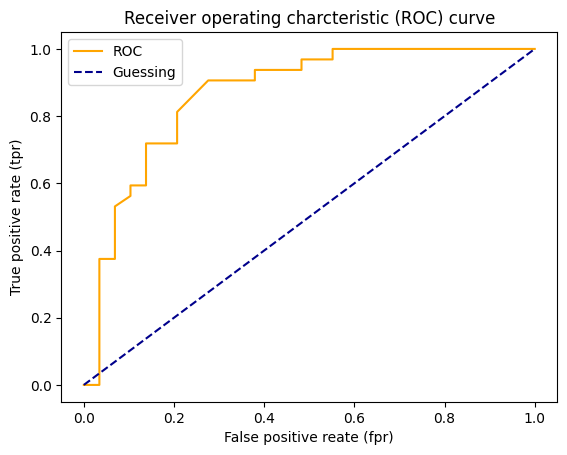

In [57]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color = "orange", label = "ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")

    # Customize the plot
    plt.xlabel("False positive reate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating charcteristic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)



In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

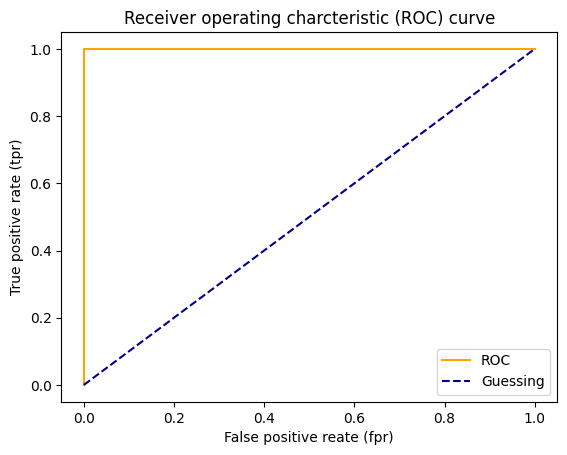

In [59]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [60]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual lables it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [61]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [62]:
# visulize confusion matrix with pd.corsstab()
pd.crosstab(y_test,
            y_preds,
            rownames= ["Actual Label"],
            colnames= ["Predictred Lables"])

Predictred Lables   0   1
Actual Label             
0                  23   6
1                   6  26

In [63]:
23+6+6+26

61

In [64]:
len(X_test)

61

<Axes: >

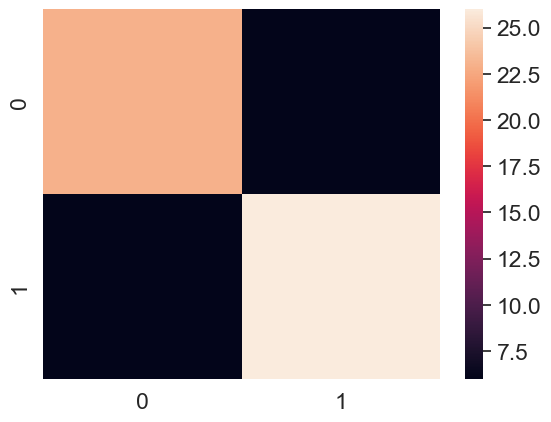

In [65]:
# Make our confusion matrix more visual with seaborn's heatamp()

import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Crate a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn 
sns.heatmap(conf_mat)


**Confustion Matrix**

In [66]:
# See here for sklearn confusion matrix 
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_text)

confusion_matrix(y_test, y_preds)

NameError: name 'X_text' is not defined

In [ ]:
pd.crosstab(y_test,y_preds,
            rownames=["Actual Label"],
            colnames = ["Predicted Label"])

Predicted Label   0   1
Actual Label           
0                16  13
1                14  18

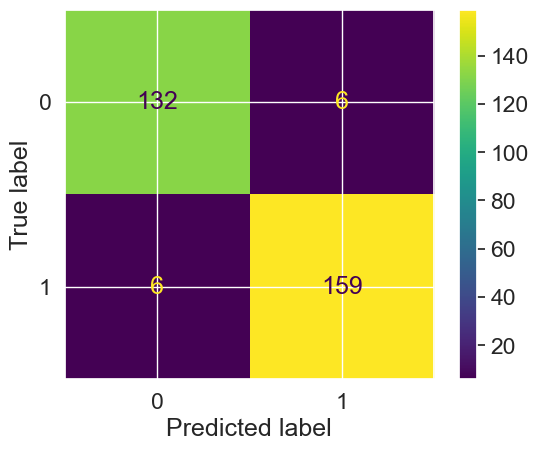

In [ ]:
# Creating a confusion matrix using Scikit-Learn

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator= clf,X=X, y= y)

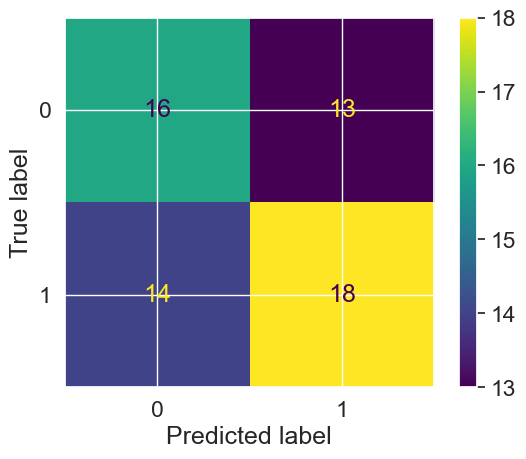

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54        29
           1       0.58      0.56      0.57        32

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61



In [ ]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict = True))

c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pradip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

0.0  1.0  accuracy     macro avg  weighted avg
precision     0.99990  0.0    0.9999      0.499950       0.99980
recall        1.00000  0.0    0.9999      0.500000       0.99990
f1-score      0.99995  0.0    0.9999      0.499975       0.99985
support    9999.00000  1.0    0.9999  10000.000000   10000.00000

### 4.2.2 Regression model evaluation metrics

1. R^2 or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1 )
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8065734772187598

In [ ]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [ ]:
y_test.mean()

2.0550030959302323

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true= y_test,
         y_pred= y_test_mean)

0.0

In [ ]:
r2_score(y_true= y_test,
         y_pred = y_test_mean)

0.0

**Mean Squared Error**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [ ]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [ ]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [ ]:
y_test[:5]

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: target, dtype: float64

In [ ]:
df = pd.DataFrame(data = {"actual values":y_test,
                          "predicted values": y_preds})
df["differences"] = df["predicted values"]- df["actual values"]
df.head(10)

actual values  predicted values  differences
20046        0.47700          0.493840     0.016840
3024         0.45800          0.754940     0.296940
15663        5.00001          4.928596    -0.071414
20484        2.18600          2.543160     0.357160
9814         2.78000          2.331760    -0.448240
13311        1.58700          1.652530     0.065530
7113         1.98200          2.343230     0.361230
7668         1.57500          1.661820     0.086820
18246        3.40000          2.474890    -0.925110
5723         4.46600          4.834478     0.368478

In [ ]:
# MAE using formulas and differences
df["differences"].mean()

0.012048392126937589

**Mean Squared Error**

MAE is the mean of the square of the errors between actual and predicted values.

In [ ]:
# Mean Squared Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mse = mean_absolute_error(y_test, y_preds)
mse

0.32659871732073664

In [ ]:
df["squared differences"] = np.square(df["differences"])
df.head()

actual values  predicted values  differences  squared differences
20046        0.47700          0.493840     0.016840             0.000284
3024         0.45800          0.754940     0.296940             0.088173
15663        5.00001          4.928596    -0.071414             0.005100
20484        2.18600          2.543160     0.357160             0.127563
9814         2.78000          2.331760    -0.448240             0.200919

In [ ]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"] = 16

In [ ]:
df_large_error.head()

actual values  predicted values  differences  squared differences
20046        0.47700          0.493840     0.016840            16.000000
3024         0.45800          0.754940     0.296940             0.088173
15663        5.00001          4.928596    -0.071414             0.005100
20484        2.18600          2.543160     0.357160             0.127563
9814         2.78000          2.331760    -0.448240             0.200919

In [ ]:
# Calculate MSE with larget error
df["squared differences"].mean()

0.2534678520824551

In [ ]:
df_large_error.iloc[1:100] = 20
df_large_error

actual values  predicted values  differences  squared differences
20046        0.47700          0.493840     0.016840            16.000000
3024        20.00000         20.000000    20.000000            20.000000
15663       20.00000         20.000000    20.000000            20.000000
20484       20.00000         20.000000    20.000000            20.000000
9814        20.00000         20.000000    20.000000            20.000000
...              ...               ...          ...                  ...
15362        2.63300          2.220380    -0.412620             0.170255
16623        2.66800          1.947760    -0.720240             0.518746
18086        5.00001          4.836378    -0.163632             0.026775
2144         0.72300          0.717820    -0.005180             0.000027
3665         1.51500          1.679010     0.164010             0.026899

[4128 rows x 4 columns]

In [ ]:
# Calculate MSE with larget error
df_large_error["squared differences"].mean()

0.7334180712088106

Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

**Evaluating A model with cross validation and scoring parameter**

### 4.2.1 finally using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators= 100)


In [ ]:
np.random.seed(42)

# Cross-validation accuray
cv_acc = cross_val_score(clf,X,y,cv =5, scoring = None) # if scoring = None, eastimatos' default scoring evaluation matrix will use
cv_acc 

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Cross-validated accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")
cv_acc

The cross validated accuracy is: 82.48%


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y, cv = 5, scoring= "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
# Cross-Validated precision
print(f'The cross-validated precision is:{np.mean(cv_precision)}' )

The cross-validated precision is:0.8329547346025924


In [ ]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y, cv =5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
# Cross-Validated recall
print(f'The cross-validated recall is:{np.mean(cv_recall)}' )

The cross-validated recall is:0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators= 100)

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv =3, scoring= None)
np.mean(cv_r2)

0.6545458023124507

In [ ]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [ ]:
# Mean Accuracy Error
cv_mse = cross_val_score(model,X,y,cv =3, scoring= "neg_mean_squared_error")
np.mean(cv_mse)

-0.46251249505519193

In [ ]:
cv_mse

array([-0.51792989, -0.42196261, -0.50353093])

In [ ]:
# Mean Squareed error
cv_mae = cross_val_score(model,X,y, cv = 3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4826099852616279

In [ ]:
cv_mae

array([-0.51619806, -0.42482185, -0.50681005])

### 4.3 Using different evaluation metrics as Scikit-Learn functions



In [81]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis =1 )
y = heart_disease["target"]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print("classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,clf.predict(X_test))*100:.2f}%")
print(f"Recall: {recall_score(y_test,clf.predict(X_test))*100:.2f}%")
print(f"F1: {f1_score(y_test,clf.predict(X_test))*100:.2f}%")

classifier metrics on the test set
Accuracy: 75.41%
Precision: 82.35%
Recall: 75.68%
F1: 78.87%


In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

# Create the model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regressopm metrixs on the test set")
print(f"R2 score:{r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regressopm metrixs on the test set
R2 score:0.8065734772187598
MAE: 0.32659871732073664
MSE:0.2534678520824551


### 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data presepective:
* Could we collect more data? (generally, the more data, the better)
* Could we import our data? 


From a model prespective.
* is there a better model we could use?
* Could we improve the current model?

Parameter vs Hyperparameters:

* Parameters = model find these patterns in data
* Hyperparamers = setting on a model you can adjust to (portentially) improve its ability to find patterns


In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [88]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters 

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators` 

In [96]:
def evaluate_preds(y_true, y_preds):
    """    
    Performs evaluation comparisom on y_true labels vs. y_preds labels on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision":round(precision,2),
                   "recall": round(recall, 2),
                   "f1": round(f1,2)}
    
    print(f"Acc:{accuracy * 100:2f}%")
    print(f"Precision:{precision:.2f}%")
    print(f"Recall:{recall:.2f}%")
    print(f"F1 score:{f1:.2f}")

    return metric_dict


In [97]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac= 1)

# Split into x and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [98]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc:82.222222%
Precision:0.81%
Recall:0.88%
F1 score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [99]:
np.random.seed(42)

# Create a secon classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators= 100)
clf_2.fit(X_train, y_train)

# make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc:82.222222%
Precision:0.84%
Recall:0.84%
F1 score:0.84
